In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import json

In [96]:
!python3.8 format.py --name "New York" --n1 "(3, 40.74605893499274, -73.99053528624474)" --d_m 79

Meters per pixel: 0.6183017793539175


In [92]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def get_label(name: str):
    name.replace("-", " ")
    name.replace("_", " ")

    label = ""
    for word in name.split(" "):
        if len(word) > 2 and word[:-2].isnumeric():
            label += word[:-2]
        else: label += word[0]
    return label

In [93]:
G = nx.Graph()

with open('out/nodes.json') as f:
    nodes = json.load(f)

for i, node in enumerate(nodes):
    G.add_node(i, pos=(node[0], node[1]))

with open('out/edges.json') as f:
    edges = json.load(f)

with open('out/streets.json', 'r') as f:
    streets = json.load(f)

for street, street_edges in streets.items():
    for edge_index in street_edges:
        edge = edges[edge_index]

        n1 = G.nodes[edge[0]]['pos']
        n2 = G.nodes[edge[1]]['pos']
        dist = distance(n1, n2)
        G.add_edge(edge[0], edge[1], weight=dist, street=street)
    
with open('out/pois.json') as f:
    pois = json.load(f)
    pois.sort(key=lambda x: x["name"])

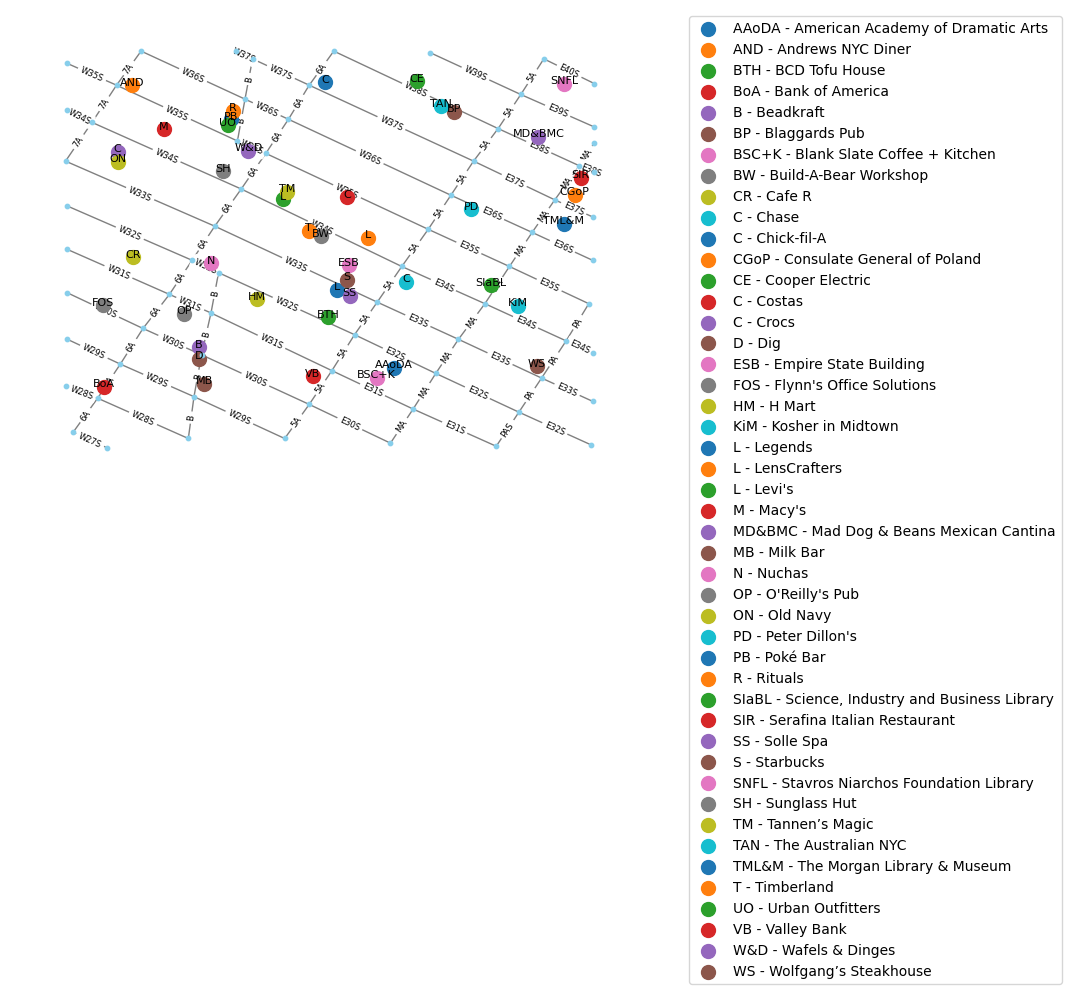

In [94]:
pos = nx.get_node_attributes(G, "pos")

nx.draw(
    G,
    pos,
    #with_labels=True,
    node_size=10,
    node_color="skyblue",
    font_size=10,
    font_color="black",
    font_weight="bold",
    edge_color="gray",
)

labels = nx.get_edge_attributes(G, "street")
#labels = {k: round(v, 2) for k, v in labels.items()}
labels = {k: get_label(v) for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6)

for poi in pois:
    coords = poi["coords"]
    plt.scatter(
        coords[0], coords[1], s=100, label=f"{get_label(poi['name'])} - {poi['name']}"
    )
    plt.text(coords[0], coords[1], get_label(poi["name"]), fontsize=8, ha="center")

plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [95]:
G.get_edge_data(61, 68)

{'weight': 52.55565124508299, 'street': 'Madison Avenue'}